# Случайные процессы

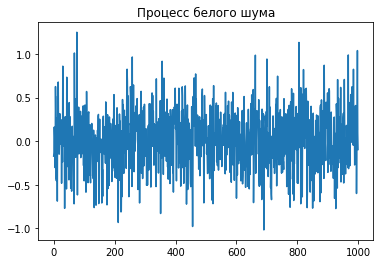

In [49]:
import math
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt


N = 1000
X = [np.random.normal(0, 1 / 3) for _ in range(N)]

plt.plot(X)
plt.title('Процесс белого шума')
plt.show()

![function](src/lab4/func.jpg)

In [53]:
alpha = 1
n = 14

autocorrelation = lambda tau: np.exp(- alpha * abs(tau)) * (1 + alpha * abs(tau))

def equation(c):
    R = [autocorrelation(0.4 * i) for i in range(0, n)]
    a = np.array([[c[j] for j in range(i, n)] + [0] * i for i in range(n)])
    b = np.array([c[i] for i in range(n)])
    res = np.dot(a, b)
    return [row - R[i] for i, row in enumerate(res)]

C = fsolve(equation, [1] * n)

print(C)

random_process = [sum([C[j] * X[i - j] for j in range(n)]) for i in range(n - 1, N)]

print(random_process)

[0.1093527  0.00952549 0.03830595 0.08650127 0.10453365 0.12446328
 0.18105413 0.23788522 0.28947083 0.35714065 0.43153789 0.46672668
 0.41948461 0.27787319]
[-0.007879169431038266]


In [52]:
M = sum(y) / len(y)
D = sum([y[i] ** 2 for i in range(len(y))]) / len(y) - M ** 2

print('* Теоретические')
print('M =', 0, 'D =', 1)
print('* Практические')
print('M =', M, 'D =', D)

NameError: name 'y' is not defined